#Analyzing Bumble Profiles
Insights & Summary
The objective of this analysis was to understand user demographics, lifestyle preferences, and behavioral patterns on the Bumble platform.
It explored how factors like age, gender, income, pets, diet, and zodiac signs vary across different groups.

Key Insights:
1. Age Distribution
Most users fall between the age group of 21 to 35 years.

Younger users are slightly more dominant on the platform.

Age distribution differs by gender — some age brackets show a higher representation of females or males.

2. Gender vs Height & Age
Average height varies slightly across genders.

Age groups were split into "younger" (<21) and "older" (21+), helping understand behavioral trends.

3. Dietary Preferences
"Anything" was the most common diet category, followed by "vegetarian".

Users with stricter diets like "vegan" showed relatively lower drinking habits.

4. Drinking Habits vs Diet
Clear patterns showed that users with more flexible diets tend to drink more often.

Vegans and vegetarians reported lower levels of drinking.

5. Location (City/State)
Top states and cities with the most users were identified.
Certain cities like San Francisco   
Oakland had a younger populations. Income levels also varied across regions.

6. Income Distribution
Many users left income as blank or 0, suggesting sensitivity or a lack of disclosure.

Older users tend to report higher income compared to younger users.

Gender-wise, males reported slightly higher incomes on average.

7. Pets
“Likes dogs and cats” was the most common pet preference.

Younger users showed higher interest in pets compared to older users.

8. Zodiac Sign
“Likes dogs” is the most common pet preference.

Zodiac signs are fairly evenly distributed; however, some signs like Virgo and Scorpio appear slightly more.

 Recommendations
Marketing Strategy: Target the 21–35 age group with flexible diets and pet preferences.

Location-Specific Campaigns: Cities with higher young user bases can be targeted with career or interest-based matching features.

Zodiac and Personal Traits: Add optional filters like zodiac compatibility for user engagement.

Income & Privacy: Allow users to skip sensitive income questions but enable ranges or tiers for better classification.


In [1]:
import pandas as pd


In [13]:
df=pd.read_csv("data/bumble.csv")


In [ ]:
#Part 1: Data Cleaning
#Q1.1 Which columns in the dataset have missing values, and what percentage of data is missing in each column?


In [54]:
missing_values = df.isnull().sum()#missing value
missing_percentage = (missing_values / len(df)) * 100 # percetage of missing value 
missing_data_report = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data_report)



             Missing Values  Percentage
age                       0    0.000000
status                    0    0.000000
gender                    0    0.000000
body_type              3938    8.054817
diet                  18770   38.392309
drinks                 1526    3.121293
education              4217    8.625486
ethnicity              3945    8.069135
height                    1    0.002045
income                    0    0.000000
job                    4961   10.147269
last_online               0    0.000000
location                  0    0.000000
pets                  13718   28.058908
religion              14130   28.901616
sign                      0    0.000000
speaks                   30    0.061362
main_sign                 0    0.000000


In [55]:
#Part 1: Data Cleaning
# q1.2 Are there columns where more than 50% of the data is missing? Would you drop those columns where missing values are >50%. If yes, why?


In [6]:
import pandas as pd

df = pd.read_csv("data/bumble.csv")

# % of missing values per column
missing_percent = df.isnull().mean() * 100

# sort by missing percentage
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']
missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)

#  top 5 columns with the highest missing data %
print(" Top 5 columns with highest missing data:")
print(missing_df.head(5))



 Top 5 columns with highest missing data:
      Column  Missing_Percentage
4       diet           40.694959
14  religion           33.740366
13      pets           33.231575
15      sign           18.443266
10       job           13.675641


In [ ]:
#Part 1: Data Cleaning
# Q1.3 How would you handle the missing numerical data (e.g., height, income)? 
#Would you impute the missing data by the median or average value of height and income for the corresponding category, 
#such as gender, age group, or location. If yes, why?

In [19]:
import pandas as pd

df = pd.read_csv("data/bumble.csv")

df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 100], 
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'], 
                         ordered=True)


df['height'] = df.groupby(['gender', 'age_group'], observed=False)['height'].transform(lambda x: x.fillna(x.median()))
df['income'] = df.groupby(['gender', 'age_group'], observed=False)['income'].transform(lambda x: x.fillna(x.median()))

df.drop(columns=['age_group'], inplace=True)

print(df.isnull().sum())


age                0
status             0
gender             0
body_type       5296
diet           24395
drinks          2985
education       6628
ethnicity       5680
height           311
income           311
job             8198
last_online        0
location           0
pets           19921
religion       20226
sign           11056
speaks            50
dtype: int64


In [7]:
#2.Data Types
#Q2.1 Are there any inconsistencies in the data types across columns (e.g., numerical data stored as strings)?


#

print("Data Types:\n", df.dtypes.head(10))

#  object columns that might contain numeric values
possible_numeric = df.select_dtypes(include='object')
print("\nObject Columns (Check for numeric data stored as strings):\n", possible_numeric.head())

#  columns to numeric (example: 'income', 'height' if needed)
for col in ['income', 'height', 'age']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')



Data Types:
 age            int64
status        object
gender        object
body_type     object
diet          object
drinks        object
education     object
ethnicity     object
height       float64
income         int64
dtype: object

Object Columns (Check for numeric data stored as strings):
       status gender       body_type               diet    drinks  \
0     single      m  a little extra  strictly anything  socially   
1     single      m         average       mostly other     often   
2  available      m            thin           anything  socially   
3     single      m            thin         vegetarian  socially   
4     single      m        athletic                NaN  socially   

                           education            ethnicity  \
0      working on college/university         asian, white   
1              working on space camp                white   
2     graduated from masters program                  NaN   
3      working on college/university             

In [ ]:
#Q2.2Which columns require conversion to numerical data types for proper analysis (e.g., income)?



In [21]:
import pandas as pd

df = pd.read_csv("data/bumble.csv")

#data types
print("Original Data Types:\n", df.dtypes)

#  columns that should be numeric but are stored as objects
numeric_columns = ['age', 'height', 'income']  
converted_columns = []

for col in numeric_columns:
    if df[col].dtype == 'object':  
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  
            converted_columns.append(col)
        except ValueError:
            print(f"Column '{col}' contains non-numeric values and could not be converted.")
print("\nUpdated Data Types:\n", df.dtypes)

if converted_columns:
    print(f"\nColumns converted to numeric: {converted_columns}")
else:
    print("\nNo conversions were needed.")


Original Data Types:
 age              int64
status          object
gender          object
body_type       object
diet            object
drinks          object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
pets            object
religion        object
sign            object
speaks          object
dtype: object

Updated Data Types:
 age              int64
status          object
gender          object
body_type       object
diet            object
drinks          object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
pets            object
religion        object
sign            object
speaks          object
dtype: object

No conversions were needed.


In [ ]:
#Q2.3Does the last_online column need to be converted into a datetime format? What additional insights can be gained by analyzing this as a date field?

In [29]:
import pandas as pd

df['last_online'] = pd.to_datetime(df['last_online'], errors='coerce')

df['last_online'] = df['last_online'].dt.tz_localize(None)

print(df.dtypes)
print(df['last_online'].head())


age                     int64
status                 object
gender                 object
body_type              object
diet                   object
drinks                 object
education              object
ethnicity              object
height                float64
income                  int64
job                    object
last_online    datetime64[ns]
location               object
pets                   object
religion               object
sign                   object
speaks                 object
dtype: object
0                   NaT
1                   NaT
2   2012-06-27 09:00:00
3                   NaT
4                   NaT
Name: last_online, dtype: datetime64[ns]


In [4]:
#3. Outliers
# q3.1 Are there any apparent outliers in numerical columns such as age, height, 
#or income? What are the ranges of values in these columns?
import pandas as pd
df = pd.read_csv("data/bumble.csv")
#  'age', 'height', 'income'
cols = ['age', 'height', 'income']

# mean and std dev for each column
mean = df[cols].mean()
std = df[cols].std()

# S manually calculate Z-scores
z_scores = (df[cols] - mean) / std

# filter out rows with any Z-score > 3 or < -3
outliers_manual = df[(z_scores > 3) | (z_scores < -3)].dropna(how='all')
print(outliers_manual[cols])


        age  height     income
48      NaN     NaN  1000000.0
102     NaN     NaN  1000000.0
107     NaN     NaN   500000.0
123     NaN     NaN  1000000.0
172    62.0     NaN        NaN
...     ...     ...        ...
59601  69.0     NaN        NaN
59740  61.0     NaN        NaN
59818   NaN     NaN  1000000.0
59837  66.0     NaN        NaN
59855   NaN     NaN  1000000.0

[1647 rows x 3 columns]


In [12]:
#Any -3.2 Any -1 values in numerical columns like income should be replaced with blank, as they may represent missing or invalid data.

import pandas as pd
import numpy as np

df = pd.read_csv("data/bumble.csv")

df['income'] = df['income'].replace(-1, np.nan)
print("After replacement, any -1 in income column?:", (df['income'] == -1).sum())
# Show a few rows
print(df[['income']].head(100))



After replacement, any -1 in income column?: 0
     income
0       NaN
1   80000.0
2       NaN
3   20000.0
4       NaN
..      ...
95  80000.0
96      NaN
97      NaN
98      NaN
99      NaN

[100 rows x 1 columns]


In [13]:
#Q3.3 For other outliers, how would you ensure that they o not disproportionately impact the analysis while 
#retaining as much meaningful data as possible? Would you delete the data or rather than deleting them, 
#calculate the mean and median values using only the middle 80% of the data (removing extreme high and low values). 
#Provide appropriate reasons for every step.

import pandas as pd
import numpy as np

df = pd.read_csv("data/bumble.csv")
# replace invalid values
df['income'] = df['income'].replace(-1, np.nan)
df['age'] = df['age'].replace(-1, np.nan)
df['height'] = df['height'].replace(-1, np.nan)
# the middle 80%
def middle_80_stats(series):
    lower = series.quantile(0.10)
    upper = series.quantile(0.90)
    middle_data = series[(series >= lower) & (series <= upper)]
    return middle_data.mean(), middle_data.median()

#  numerical columns
for col in ['age', 'height', 'income']:
    mean_80, median_80 = middle_80_stats(df[col].dropna())
    print(f"{col}: Mean (middle 80%) = {mean_80:.2f}, Median (middle 80%) = {median_80:.2f}")



age: Mean (middle 80%) = 31.09, Median (middle 80%) = 30.00
height: Mean (middle 80%) = 68.23, Median (middle 80%) = 68.00
income: Mean (middle 80%) = 57362.32, Median (middle 80%) = 50000.00


           Missing Count  Missing Percentage
diet               24395               40.69
religion           20226               33.74
pets               19921               33.23
sign               11056               18.44
job                 8198               13.68
education           6628               11.06
ethnicity           5680                9.48
body_type           5296                8.83
drinks              2985                4.98
speaks                50                0.08
height                 3                0.01


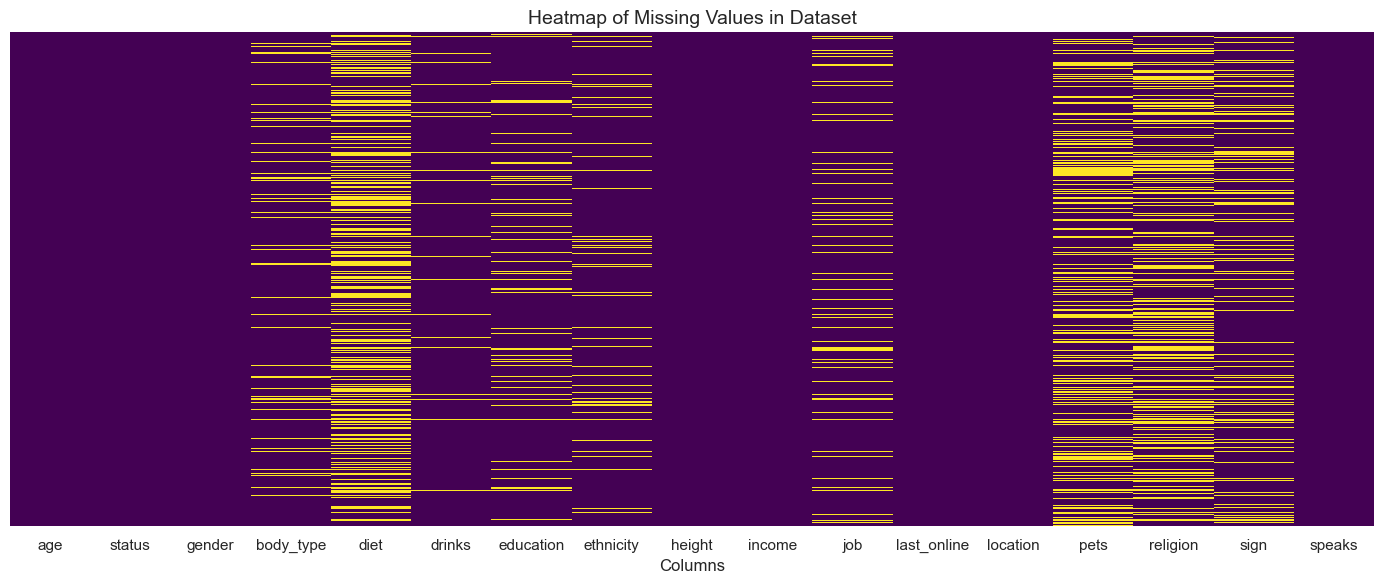

In [4]:
# 4. Missing Data Visualization
#Q1 Create a heatmap to visualize missing values across the dataset. Which columns show consistent missing data pattern
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/bumble.csv")

missing_summary = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().mean() * 100).round(2)
})

missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
print(missing_summary.sort_values(by='Missing Percentage', ascending=False))


 # heatmap to visualize missing values across the datase
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values in Dataset', fontsize=14)
plt.xlabel('Columns')
plt.tight_layout()
plt.show()






In [22]:
#pPart 2: Data Processing
#1. Binning and Grouping
#How would you bin the age column into categories (e.g. "18-25", "26-35", "36-45", and "46+" ) 
#to create a new column, age_group. How does the distribution of users vary across these age ranges?
#define bins and labels
bins = [17, 25, 35, 45, 120]
labels = ['18-25', '26-35', '36-45', '46+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

age_dist = df['age_group'].value_counts().sort_index()
print("Distribution of users across age groups:")
print(age_dist)


Distribution of users across age groups:
age_group
18-25    14454
26-35    28621
36-45    10803
46+       6068
Name: count, dtype: int64


In [26]:
#pPart 2: Data Processing
#2.2Group income into categories like "Low Income," "Medium Income," and "High Income" based on meaningful thresholds (e.g., quartiles). 
#What insights can be derived from these groups

import pandas as pd
df = pd.read_csv("data/bumble.csv")
df['income'] = df['income'].replace(-1, pd.NA)

income_non_null = df['income'].dropna()

income_bins = pd.qcut(income_non_null, q=[0, 0.33, 0.66, 1], 
                      labels=['Low Income', 'Medium Income', 'High Income'])

df.loc[income_non_null.index, 'income_group'] = income_bins
print(df['income_group'].value_counts())



income_group
Medium Income    4534
Low Income       4000
High Income      2970
Name: count, dtype: int64


In [32]:
#2. Derived Features
#2.2.2Derived features are new columns created based on the existing data to add depth to the analysis. 
#These features often reveal hidden patterns or provide new dimensions to explore.

#Questions:
#Create a new feature, profile_completeness, by calculating the percentage of non-missing values for each user profile. 
#How complete are most user profiles, and how does completeness vary across demographics?

import pandas as pd
df = pd.read_csv("data/bumble.csv")

df['profile_completeness'] = df.apply(lambda row: (len(row) - row.isnull().sum()) / len(row) * 100, axis=1)

print(f"Overall Completeness: {df['profile_completeness'].mean():.2f}%")
print("\nCompleteness by Gender:\n", df.groupby('gender')['profile_completeness'].mean())
print("\nCompleteness by Status:\n", df.groupby('status')['profile_completeness'].mean())
print("\nCompleteness by Status:\n", df.groupby('age')['profile_completeness'].mean())


Overall Completeness: 89.75%

Completeness by Gender:
 gender
f    89.982902
m    89.596170
Name: profile_completeness, dtype: float64

Completeness by Status:
 status
available         90.357988
married           89.658444
seeing someone    90.102029
single            89.720325
unknown           82.352941
Name: profile_completeness, dtype: float64

Completeness by Status:
 age
18     88.616029
19     88.408588
20     89.673477
21     89.579701
22     89.518827
23     89.569717
24     89.469100
25     89.433088
26     89.557402
27     89.504350
28     89.261381
29     89.595644
30     89.442026
31     89.540811
32     89.554105
33     89.499227
34     89.391971
35     89.669851
36     89.795994
37     89.781112
38     90.048651
39     89.991969
40     90.119931
41     90.582233
42     90.150351
43     90.285205
44     90.503490
45     91.052969
46     90.433544
47     90.659402
48     90.901309
49     91.041907
50     90.712074
51     90.974790
52     90.817373
53     90.219421
54     

In [38]:
#3. Unit Conversion
#2.2=3.1Questions:
#Convert the height column from inches to centimeters using the conversion factor (1 inch = 2.54 cm). 
#Store the converted values in a new column, height_cm.
# Convert height from inches to centimeters
df['height_cm'] = df['height'] * 2.54

print(df[['height', 'height_cm']].head(20))



    height  height_cm
0     75.0     190.50
1     70.0     177.80
2     68.0     172.72
3     71.0     180.34
4     66.0     167.64
5     67.0     170.18
6     65.0     165.10
7     65.0     165.10
8     67.0     170.18
9     65.0     165.10
10    70.0     177.80
11    72.0     182.88
12    72.0     182.88
13    66.0     167.64
14    62.0     157.48
15    65.0     165.10
16    70.0     177.80
17    64.0     162.56
18    71.0     180.34
19    72.0     182.88


In [43]:
#Part 3: Data Analysis
#. Demographic Analysis
#3.1 What is the gender distribution (gender) across the platform? Are there any significant imbalances?
gender_counts = df['gender'].value_counts(dropna=False)
gender_percent = df['gender'].value_counts(normalize=True, dropna=False) * 100

gender_distribution = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percent.round(2)
})

print(gender_distribution)


        Count  Percentage
gender                   
m       35829       59.77
f       24117       40.23


In [7]:
#q3.2 What are the proportions of users in different status categories (e.g., single, married, seeing someone)? 
#What does this suggest about the platform’s target audience?

import pandas as pd
df = pd.read_csv("data/bumble.csv")

# count the number of users in each status category
status_counts = df['status'].value_counts(dropna=False)


total_count = len(df)
proportions = (status_counts / total_count) * 100

status_distribution = pd.DataFrame({
    'Count': status_counts,
    'Percentage': proportions.round(2)
})

print(status_distribution)

print(f"\nInsight:\nSingle is the most suggested audience for this platform based on the majority user status.\n")



                Count  Percentage
status                           
single          55697       92.91
seeing someone   2064        3.44
available        1865        3.11
married           310        0.52
unknown            10        0.02

Insight:
Single is the most suggested audience for this platform based on the majority user status.



In [9]:
#q3.3

#How does status vary by gender? For example, what proportion of men and women identify as single?

import pandas as pd
df = pd.read_csv("data/bumble.csv")

gender_counts = df['gender'].value_counts(dropna=False)
gender_percent = df['gender'].value_counts(normalize=True, dropna=False) * 100

single_by_gender = df[df['status'] == 'single']['gender'].value_counts(normalize=True) * 100

gender_distribution = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percent.round(2),
    'Single %': single_by_gender.round(2)
}).fillna(0)

print("\nGender Distribution and Proportion of Singles by Gender:\n")
print(gender_distribution)




Gender Distribution and Proportion of Singles by Gender:

        Count  Percentage  Single %
gender                             
m       35829       59.77     59.93
f       24117       40.23     40.07


In [21]:
##Part 3: Data Analysis
#2. Correlation Analysis
#What are the correlations between numerical columns such as age, income, gender Are there any strong positive or negative relationships?
import pandas as pd

df = pd.read_csv("data/bumble.csv")

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['income'] = df['income'].replace(-1, pd.NA)

# encode gender as 0 (man) and 1 (woman)
df['gender_encoded'] = df['gender'].map({'m': 0, 'w': 1})
df['gender_encoded'] = pd.to_numeric(df['gender_encoded'], errors='coerce')

filtered_df = df[['age', 'income', 'gender_encoded']].dropna()

correlation = filtered_df.corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
                     age    income  gender_encoded
age             1.000000 -0.005458             NaN
income         -0.005458  1.000000             NaN
gender_encoded       NaN       NaN             NaN


In [23]:
#3.3How does age correlate with income? Are older users more likely to report higher income levels?

import pandas as pd

df = pd.read_csv("data/bumble.csv")
df['income'] = df['income'].replace(-1, pd.NA)
df = df.dropna(subset=['age', 'income'])

# correlation
correlation = df['age'].corr(df['income'])

print(f"Correlation between Age and Income: {correlation:.2f}")


Correlation between Age and Income: -0.01


In [3]:
#3. Diet and Lifestyle Analysis
#How do dietary preferences (diet) distribute across the platform? For example, what percentage of users identify as vegetarian, vegan, or follow "anything" diets?

#How do drinking habits (drinks) vary across different diet categories? Are users with stricter diets (e.g., vegan) less likely to drink?

import pandas as pd


df = pd.read_csv("data/bumble.csv")

# drop rows where diet or drinks is missing
df_cleaned = df.dropna(subset=["diet", "drinks"])

# 1 diet Distribution (Percentage)
diet_dist = df_cleaned["diet"].value_counts(normalize=True) * 100
print(" Diet Distribution (%):")
print(diet_dist.round(2))
print("\n")

# 2 drinking Habits Across Different Diets
drink_by_diet = df_cleaned.groupby("diet")["drinks"].value_counts(normalize=True).unstack().fillna(0) * 100

print(" Drinking Habits by Diet (%):")
print(drink_by_diet.round(2))


 Diet Distribution (%):
diet
mostly anything        46.96
anything               17.33
strictly anything      14.42
mostly vegetarian       9.60
mostly other            2.82
strictly vegetarian     2.46
vegetarian              1.80
strictly other          1.25
mostly vegan            0.93
other                   0.90
strictly vegan          0.63
vegan                   0.37
mostly kosher           0.24
mostly halal            0.12
strictly halal          0.05
strictly kosher         0.05
kosher                  0.03
halal                   0.03
Name: proportion, dtype: float64


 Drinking Habits by Diet (%):
drinks               desperately  not at all  often  rarely  socially  \
diet                                                                    
anything                    0.35        4.92   9.58    8.51     75.67   
halal                       0.00       44.44  11.11    0.00     44.44   
kosher                      0.00        9.09   0.00   18.18     63.64   
mostly anything    

In [6]:

# 4. Geographical Insights

# Questions:
# Extract city and state information from the location column. What are the top 5 cities and states with the highest number of users?

# How does age vary across the top cities? Are certain cities dominated by younger or older users?

# What are the average income levels in the top states or cities? Are there regional patterns in reported income?

import pandas as pd

df = pd.read_csv("data/bumble.csv")

df = df.dropna(subset=['location'])
 # top 5 cities and states with the highest number of users
df[['city', 'state']] = df['location'].str.split(',', n=1, expand=True)
df['city'] = df['city'].str.strip()
df['state'] = df['state'].str.strip()

top_cities = df['city'].value_counts().head(5)
top_states = df['state'].value_counts().head(5)
# age vary across the top cities?
age_by_city = df[df['city'].isin(top_cities.index)].groupby('city')['age'].mean()
#the average income levels in the top states or cities
income_by_state = df[df['state'].isin(top_states.index)].groupby('state')['income'].mean()

print("Top 5 Cities:\n", top_cities)
print("\nTop 5 States:\n", top_states)
print("\nAverage Age by Top Cities:\n", age_by_city.round(2))
print("\nAverage Income by Top States:\n", income_by_state.round(2))




Top 5 Cities:
 city
san francisco    31064
oakland           7214
berkeley          4212
san mateo         1331
palo alto         1064
Name: count, dtype: int64

Top 5 States:
 state
california       59855
new york            17
illinois             8
massachusetts        5
texas                4
Name: count, dtype: int64

Average Age by Top Cities:
 city
berkeley         31.39
oakland          33.18
palo alto        31.98
san francisco    31.61
san mateo        33.44
Name: age, dtype: float64

Average Income by Top States:
 state
california       20043.47
illinois            -1.00
massachusetts     5999.20
new york         31763.82
texas             4999.25
Name: income, dtype: float64


In [13]:
# 5. Height Analysis
# What is the average height of users across different gender categories?

# How does height vary by age_group? Are there noticeable trends among younger vs. older users?

# What is the distribution of height within body_type categories (e.g., athletic, curvy, thin)? Do the distributions align with expectations?

import pandas as pd
df = pd.read_csv("data/bumble.csv")

# Q1:average height by gender
avg_height_gender = df.groupby('gender')['height'].mean()

# Q2:  age group column
def age_group(age):
    if age < 21:
        return "younger"
    else:
        return "older"
df["age_group"] = df["age"].apply(age_group)

# average height by age group
avg_height_age_group = df.groupby("age_group")["height"].mean()

# Q3: height distribution across body_type
height_body_type = df.groupby("body_type")["height"].describe()

print("Average height by gender:")
print(avg_height_gender)
print("\nAverage height by age group:")
print(avg_height_age_group)
print("\nHeight distribution within body_type categories:")
print(height_body_type)



Average height by gender:
gender
f    65.103873
m    70.443492
Name: height, dtype: float64

Average height by age group:
age_group
older      68.313828
younger    67.720235
Name: height, dtype: float64

Height distribution within body_type categories:
                  count       mean       std   min   25%   50%    75%   max
body_type                                                                  
a little extra   2629.0  68.820084  3.930905  55.0  66.0  69.0  72.00  85.0
athletic        11819.0  69.707336  3.593712   3.0  67.0  70.0  72.00  95.0
average         14652.0  68.100805  3.850883  36.0  65.0  68.0  71.00  95.0
curvy            3924.0  65.210245  3.021022  36.0  63.0  65.0  67.00  95.0
fit             12711.0  68.546062  3.767420   9.0  66.0  69.0  71.00  95.0
full figured     1009.0  66.464817  3.352475  58.0  64.0  66.0  68.00  80.0
jacked            421.0  69.292162  5.871453  37.0  66.0  70.0  72.00  95.0
overweight        444.0  68.948198  4.225529  59.0  66.0  69.0 

In [16]:
#6. Income Analysis
# What is the distribution of income across the platform? Are there specific income brackets that dominate? 
# How would you handle case where income is blank or 0?

# How does income vary by age_group and gender? Are older users more likely to report higher incomes?


import pandas as pd

df = pd.read_csv("data/bumble.csv")

# Q1: income distribution
income_distribution = df["income"].describe()
# missing/0 income
df['income_cleaned'] = df['income'].replace({0: pd.NA}) 
missing_values = df['income_cleaned'].isna().sum()
#  age group column
def age_group(age):
    if age < 21:
        return "younger"
    else:
        return "older"
df["age_group"] = df["age"].apply(age_group)

# Q2: income variation by age_group and gender
df['gender'] = df['gender'].str.strip()
income_by_age_gender = df.groupby(["age_group", "gender"])["income_cleaned"].describe()

print("Income Distribution:")
print(income_distribution)
print("\nMissing or Zero Income Count:", missing_values)
print("\nIncome by Age Group and Gender:")
print(income_by_age_gender)





Income Distribution:
count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

Missing or Zero Income Count: 0

Income by Age Group and Gender:
                    count          mean            std  min  25%  50%  \
age_group gender                                                        
older     f       23279.0  11117.303278   73177.911071 -1.0 -1.0 -1.0   
          m       34794.0  25931.577398  108749.180736 -1.0 -1.0 -1.0   
younger   f         838.0  12970.516706   97383.448422 -1.0 -1.0 -1.0   
          m        1035.0  27999.283092  141899.934613 -1.0 -1.0 -1.0   

                      75%        max  
age_group gender                      
older     f          -1.0  1000000.0  
          m          -1.0  1000000.0  
younger   f          -1.0  1000000.0  
          m       20000.0  1000000.0  


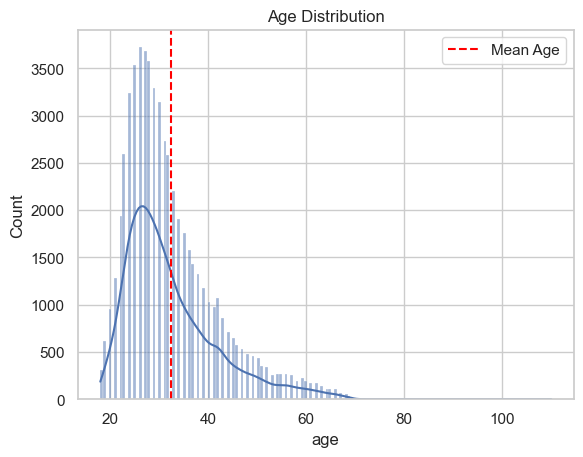

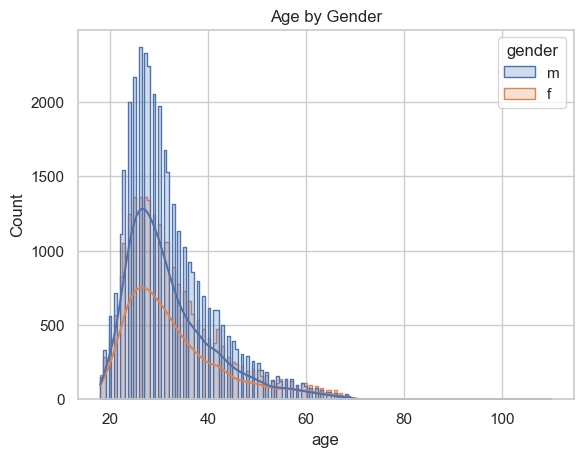

In [23]:
# Part 4: Data Visualization
# 1. Age Distribution
#  Plot a histogram of age with a vertical line indicating the mean age. 
# What does the distribution reveal about the most common age group on the platform?

# Q2 How does the age distribution differ by gender? Are there age groups where one gender is more prevalent?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/bumble.csv")
df = df.dropna(subset=['age', 'gender'])  # remove missing values

# Plot 1: age Distribution
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red', linestyle='--', label='Mean Age')
plt.title("Age Distribution")
plt.legend()
plt.show()
#Q2 How does the age distribution differ by gender? Are there age groups where one gender is more prevalent?

# Plot 2: Age Distribution by Gender
sns.histplot(data=df, x='age', hue='gender', kde=True, element='step')
plt.title("Age by Gender")
plt.show()





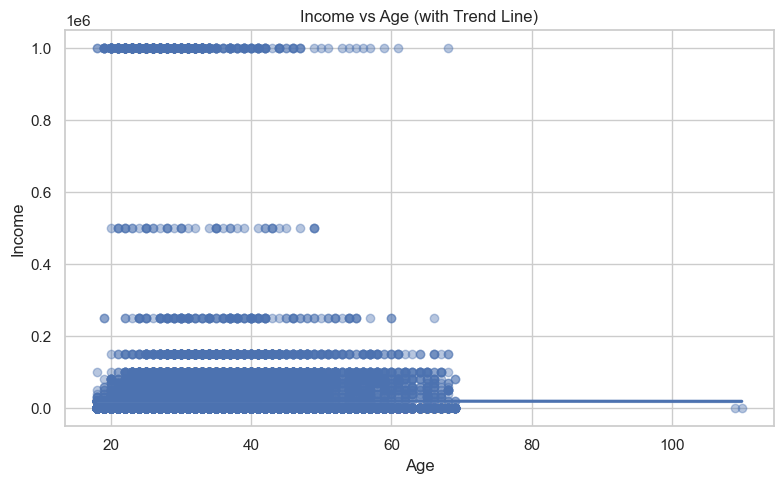

C:\Users\lohar\AppData\Local\Temp\ipykernel_23716\2550072323.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='income', palette='Set2')


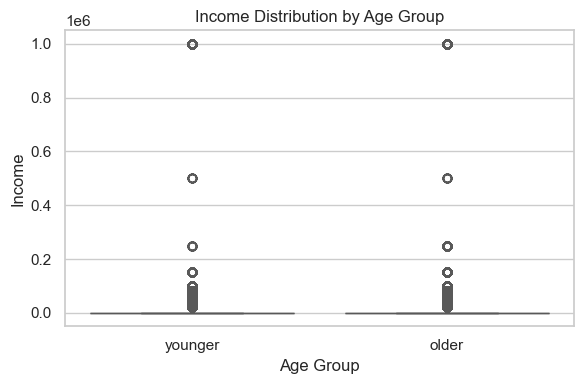

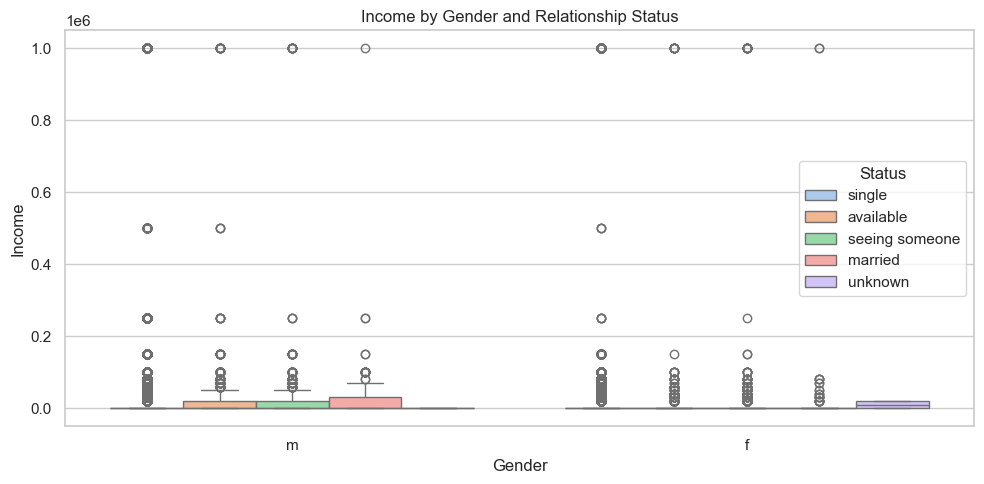

In [2]:
# Questions:. Income and Age
# 1 Use a scatterplot to visualize the relationship between income and age, with a trend line indicating overall patterns. Are older users more likely to report higher incomes?

# 2 Create boxplots of income grouped by age_group. Which age group reports the highest median income?

# 3 Analyze income levels within gender and status categories. For example, are single men more likely to report higher incomes than single women?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("data/bumble.csv")

df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age', 'income'])

#age group 
df['age_group'] = df['age'].apply(lambda x: 'younger' if x < 30 else 'older')


sns.set(style="whitegrid")

# 1. Scatterplot: Age vs Income with trend line
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='age', y='income', scatter_kws={'alpha':0.4})
plt.title("Income vs Age (with Trend Line)")
plt.xlabel("Age")
plt.ylabel("Income")
plt.tight_layout()
plt.show()

# 2. Boxplot: Income by Age Group
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='age_group', y='income', palette='Set2')
plt.title("Income Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Income")
plt.tight_layout()
plt.show()

# 3. Boxplot: Income by Gender and Status
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='gender', y='income', hue='status', palette='pastel')
plt.title("Income by Gender and Relationship Status")
plt.xlabel("Gender")
plt.ylabel("Income")
plt.legend(title='Status')
plt.tight_layout()
plt.show()



C:\Users\lohar\AppData\Local\Temp\ipykernel_23716\588142292.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pet_counts.index, y=pet_counts.values, palette="pastel")


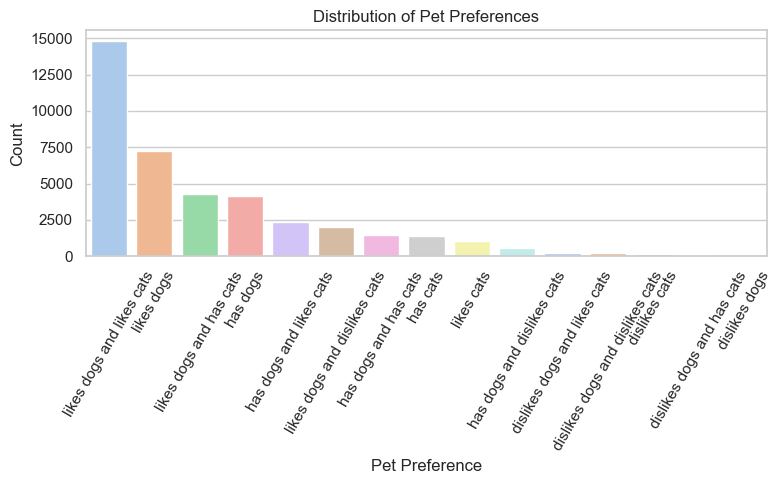

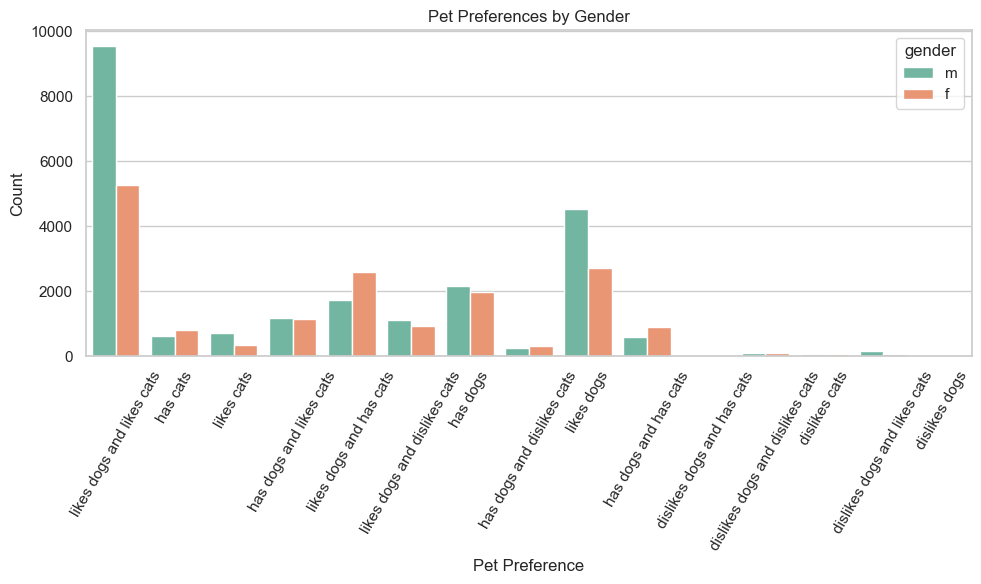

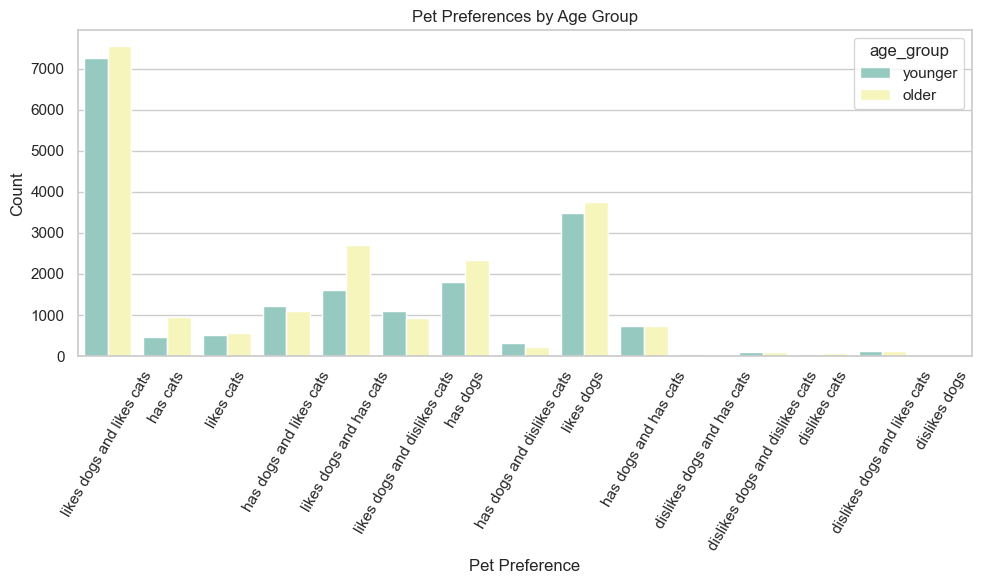

In [3]:
# # 3. Pets and Preferences
# Create a bar chart showing the distribution of pets categories (e.g., likes dogs, likes cats). Which preferences are most common?

# How do pets preferences vary across gender and age_group? Are younger users more likely to report liking pets compared to older users?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/bumble.csv")

# clean relevant columns
df = df.dropna(subset=['pets', 'gender', 'age'])

# age group column
def age_group(age):
    return "younger" if age < 30 else "older"

df['age_group'] = df['age'].apply(age_group)

# 1. Bar chart for pet preferences
plt.figure(figsize=(8, 5))
pet_counts = df['pets'].value_counts()
sns.barplot(x=pet_counts.index, y=pet_counts.values, palette="pastel")
plt.title("Distribution of Pet Preferences")
plt.ylabel("Count")
plt.xlabel("Pet Preference")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

# 2. Pets preferences across gender and age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pets', hue='gender', palette='Set2')
plt.title("Pet Preferences by Gender")
plt.xlabel("Pet Preference")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pets', hue='age_group', palette='Set3')
plt.title("Pet Preferences by Age Group")
plt.xlabel("Pet Preference")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()



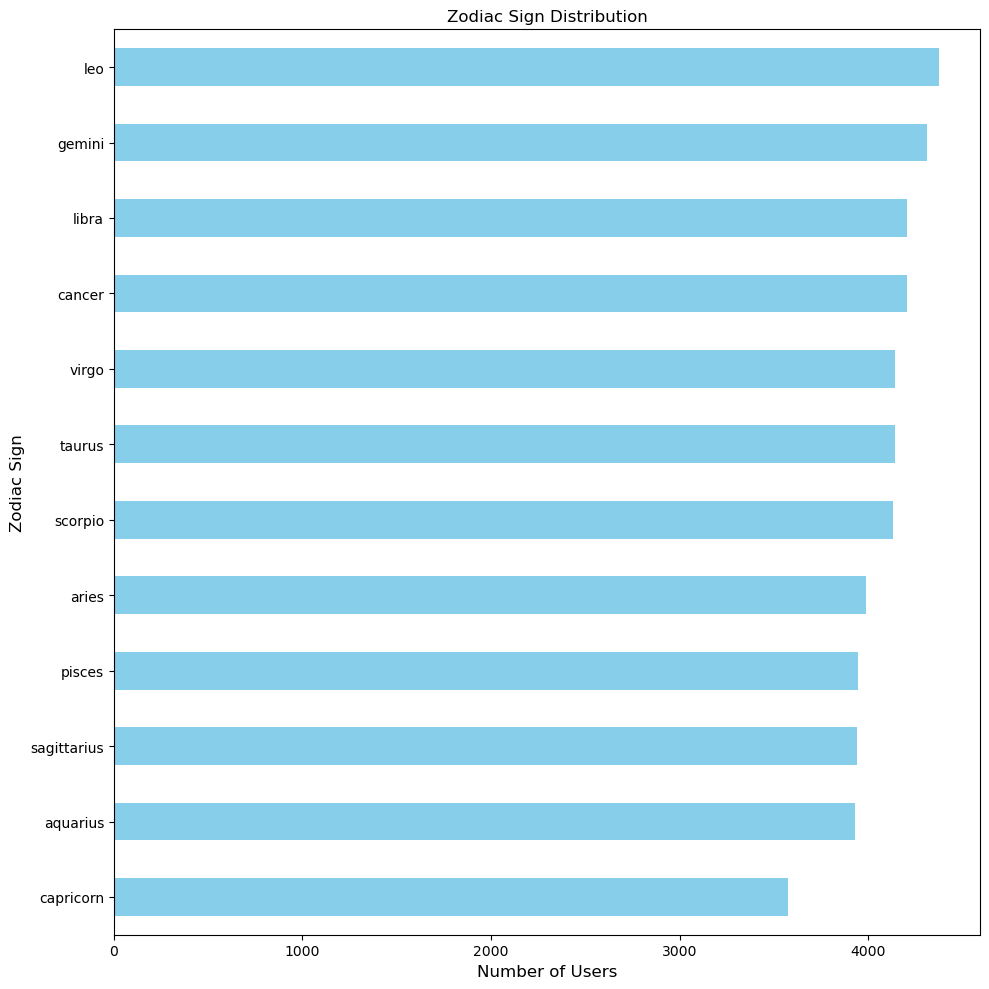

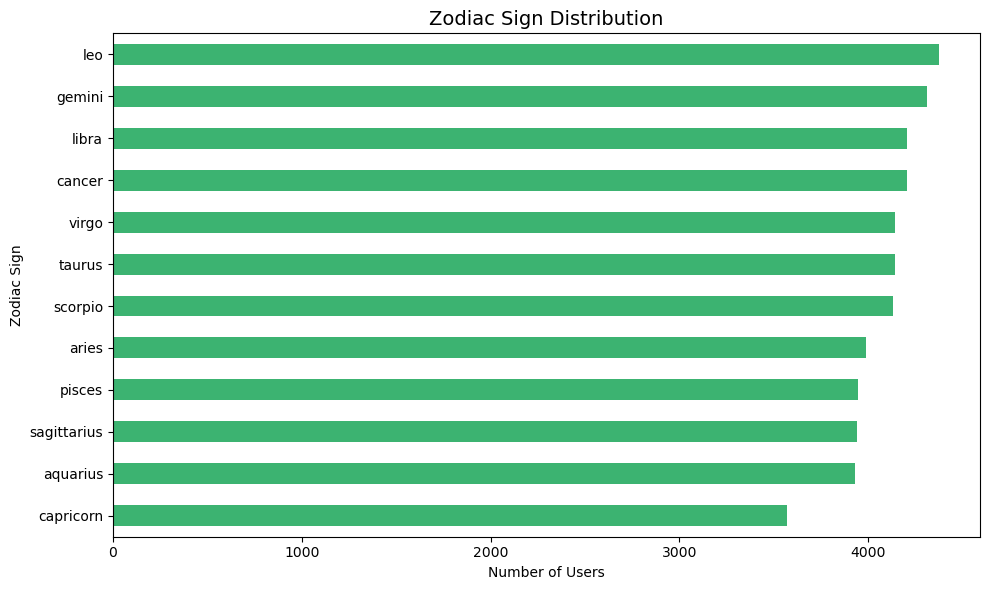

In [1]:
# 4. Signs and Personality
# Create a pie chart showing the distribution of zodiac signs (sign) across the platform. 
# Which signs are most and least represented? Is this the right chart? If not, replace with right chart.

# How does sign vary across gender and status? Are there noticeable patterns or imbalances?


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/bumble.csv")
df['main_sign'] = df['sign'].str.extract(r'^(\w+)', expand=False)
#  zodiac signs drop missing value 
sign_counts = df['main_sign'].value_counts().sort_values()

# horizontal bar chart
plt.figure(figsize=(10, 10))
sign_counts.plot(kind='barh', color='skyblue')
plt.title('Zodiac Sign Distribution')
plt.xlabel('Number of Users',fontsize=12)
plt.ylabel('Zodiac Sign',fontsize=12)
plt.tight_layout()
plt.show()

# Q2sign vary across gender and statu

# main zodiac sign names (extract the first word)
df['main_sign'] = df['sign'].str.extract(r'^(\w+)', expand=False)

# missing zodiac sign
df = df.dropna(subset=['main_sign'])

# count zodiac signs
zodiac_counts = df['main_sign'].value_counts().sort_values()

#  horizontal bar chart
plt.figure(figsize=(10, 6))
zodiac_counts.plot(kind='barh', color='mediumseagreen')

plt.title('Zodiac Sign Distribution', fontsize=14)
plt.xlabel('Number of Users')
plt.ylabel('Zodiac Sign')
plt.tight_layout()
plt.grid(False)
plt.show()
